# Análisis de sentimientos en redes sociales
```
Guillermo Molins Méndez
```

## 1. Introducción

El análisis de sentimientos es una subdisciplina de la minería de texto y el procesamiento del lenguaje natural (PLN) que se centra en identificar y extraer opiniones y emociones expresadas en el texto. Este campo ha ganado una considerable relevancia en la última década debido al auge de las redes sociales, donde millones de usuarios expresan sus pensamientos, emociones y opiniones diariamente. Plataformas como Twitter, Facebook e Instagram se han convertido en valiosas fuentes de datos para el análisis de sentimientos, ofreciendo una ventana sin precedentes hacia el comportamiento y estado emocional de la población.

Twitter, en particular, con su formato de mensajes cortos y públicos conocidos como tweets, es una plataforma ideal para el análisis de sentimientos. Los usuarios comparten una amplia gama de experiencias y emociones en tiempo real, lo que permite la recopilación y análisis de datos sobre tendencias sociales, políticas y de consumo. Además, Twitter cuenta con una API a través de la cual se han extraido los datos para este notebook.

En el contexto de la salud mental, a través del análisis de los sentimientos expresados en los tweets, es posible identificar patrones que puedan indicar condiciones de salud mental como la depresión, la ansiedad o el estrés. Esta capacidad de monitorear y clasificar el estado de salud mental en tiempo real puede ofrecer valiosos insights para los profesionales de la salud, investigadores y responsables de políticas públicas.

La clasificación de la salud mental en tweets implica el uso de algoritmos avanzados de PLN y aprendizaje automático para analizar el tono, la emoción y el contenido de los mensajes. Estos algoritmos pueden ser entrenados para reconocer palabras clave, frases y contextos que están asociados con diferentes estados emocionales y trastornos mentales. Por ejemplo, la frecuencia de palabras relacionadas con la tristeza, el aislamiento o la desesperanza puede ser indicativa de depresión, mientras que términos relacionados con el nerviosismo o la preocupación pueden señalar ansiedad.

El proceso de clasificación también puede incluir técnicas más sofisticadas como el análisis de sentimiento basado en contexto, que tiene en cuenta no solo las palabras individuales sino también la relación entre ellas y el contexto más amplio en el que se utilizan. Esta aproximación permite una interpretación más precisa de los tweets, minimizando errores y mejorando la capacidad de los modelos para identificar con precisión el estado emocional del usuario.

En resumen, el análisis de sentimientos aplicado a las redes sociales, y en particular a Twitter, ofrece una poderosa herramienta para la clasificación y monitoreo de la salud mental. Esta tecnología no solo permite una comprensión más profunda de los estados emocionales de los individuos en tiempo real, sino que también abre nuevas vías para la intervención temprana y el apoyo a aquellos que lo necesitan, contribuyendo significativamente a la mejora del bienestar mental en la sociedad.

## 2. Análisis de datos exploratorio

Comenzamos por hacer un análisis preliminar exploratorio para comprender mejor el dataset

In [1]:
# Import libraries
import pandas as pd

# Import dataset
df = pd.read_csv('./Mental-Health-Twitter/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [2]:
df.shape

(20000, 11)

In [3]:
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

Nuestro dataset se compone de 20000 muestras (tweets) y recopila 10 variables. No tenemos valores nulos. Una de estas es "label" que asumimos es la etiqueta que nos indica la clase a predecir (en este caso, el sentimiento del tweet).

<Axes: ylabel='count'>

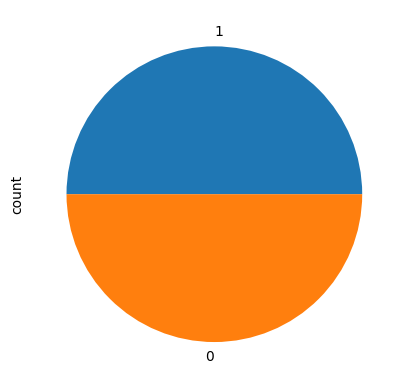

In [4]:
df.label.value_counts().plot(kind="pie")

Tenemos un dataset balanceado.

Como curiosidad, podemos buscar los mensajes con mayor número de retweets.

In [5]:
# Search for top 10 most retweets
most_reetweeted = df.nlargest(n=10, columns=['retweets'])
most_reetweeted

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
16482,16482,811546437259436032,Wed Dec 21 12:18:43 +0000 2016,RT @omgAdamSaleh: We got kicked out of a @Delt...,490044008,1849,561,8229,86352,839540,0
10066,10066,819078760758738944,Wed Jan 11 07:09:28 +0000 2017,RT @POTUS: Thank you for everything. My last a...,3249600438,235,185,24407,22302,822450,0
13870,13870,819062580740235268,Wed Jan 11 06:05:11 +0000 2017,RT @POTUS: Thank you for everything. My last a...,1497350173,640,445,24297,52892,820245,0
6354,6354,596272988351107072,Thu May 07 11:18:53 +0000 2015,RT @Louis_Tomlinson: Our fans support really h...,1306425758,734,1899,154,5929,402946,1
14330,14330,813836747406774272,Tue Dec 27 19:59:35 +0000 2016,RT @HamillHimself: no words #Devastated https:...,1497350173,640,445,24297,52892,358548,0
10851,10851,813954708092125185,Wed Dec 28 03:48:19 +0000 2016,RT @HamillHimself: no words #Devastated https:...,3249600438,235,185,24407,22302,358536,0
12158,12158,813998469455040512,Wed Dec 28 06:42:13 +0000 2016,RT @HamillHimself: no words #Devastated https:...,171999132,252,2119,704,1428,358510,0
6359,6359,596217206867800065,Thu May 07 07:37:13 +0000 2015,RT @Louis_Tomlinson: @NaughtyBoyMusic Jesus fo...,1306425758,734,1899,154,5929,341695,1
6358,6358,596217266422722560,Thu May 07 07:37:28 +0000 2015,RT @Louis_Tomlinson: @NaughtyBoyMusic good for...,1306425758,734,1899,154,5929,306473,1
15535,15535,815506107544145920,Sun Jan 01 10:33:02 +0000 2017,RT @edsheeran: Hello 2017... https://t.co/1Uyj...,490044008,1849,561,8229,86352,273872,0


A continuación calculamos la longitud promedio de los tweets.

In [6]:
# Apply a lambda function to calculate the total length of the text in words (separated by spaces)
df["text_length"] = df["post_text"].apply(lambda texto: len(texto.split(" ")))
df["text_length"].describe()

count    20000.000000
mean        12.554200
std          6.918038
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         57.000000
Name: text_length, dtype: float64

<Axes: >

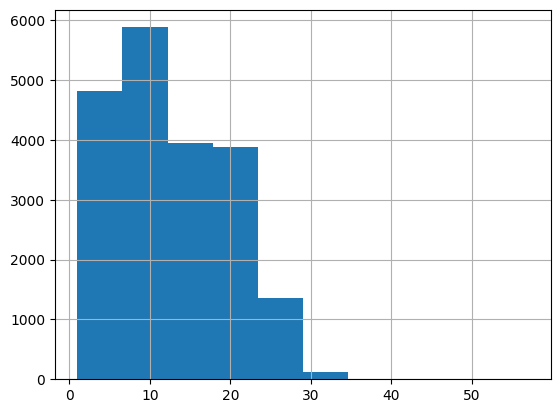

In [7]:
df["text_length"].hist()

Como se muestra, tenemos una longitud promedio de 12 palabras y media. La moda son 10 palabras por tweet.

## 3. Preprocesamiento de los datos

Un tweet es una forma de redacción única que presenta varias particularidades en comparación con otros tipos de textos a la hora del preprocesado. En este sentido, nos centraremos en corregir los siguientes aspectos:
- A menudo, se utilizan mayúsculas en los tweets para acentuar la importancia de algo. Sin embargo, convertiremos todos nuestros tweets a minúscula ya que nuestro dataset no es lo suficientemente grande como para poder hacer distinciones tan específicas.
- URLs y enlaces: Los tweets a menudo contienen enlaces que no aportan información relevante para el análisis del texto.
- Hashtags y menciones: Para este análisis conservaremos el contenido de los hashtags (#) ya que en muchas ocasiones se utilizan palabras corrientes en estos. En el caso de las menciones (@) optaremos por sustituirlas por "user" ya que no aportan al análisis de sentimiento.
- Emojis y emoticonos: Son una manera muy directa de representar emociones y por tanto un elemento determinante para la inferencia. Por esto trataremos de mantener los emojis.

In [8]:
import re

# Definimos nuestra función para el limpiado de texto
def parse_sentence(text: str):
    clean_text = ""
    for word in text.lower().split(" "):
        if word.startswith('@') and len(word) > 1:
            word = 'user'
        elif word.startswith('http'):
            word = 'http'
        clean_text += word + " "
    clean_text = re.sub(r'["#$%&\'()*+,\-./:;<=>@[\]^_`{|}~―]', '', clean_text)
    clean_text = clean_text.replace('  ', ' ')
    return clean_text[:-1]

In [9]:
texts = df["post_text"].apply(lambda texto: parse_sentence(texto)).values

In [10]:
texts

array(['its just over 2 years since i was diagnosed with anxiety and depression today im taking a moment to reflect on how far ive come since',
       'its sunday i need a break so im planning to spend as little time as possible on the a14',
       'awake but tired i need to sleep but my brain has other ideas',
       ...,
       'the flow chart is a most thoroughly oversold piece of program documentation frederick brooks jr the mythical man month',
       'ships are safe in harbor but they were never meant to stay there',
       'black holes are where god is dividing by zero'], dtype=object)

In [11]:
df["post_text"][41]

'Truly so awful 😟 https://t.co/jI4Lw4K8co'

In [12]:
texts[41]

'truly so awful 😟 http'

A continuación, definimos nuestros conjuntos de entramiento y test

In [13]:
from sklearn.model_selection import train_test_split

label = df['label'].values
x_train, x_test, y_train, y_test = train_test_split(texts, label, test_size=0.2, random_state=42)

Ahora procesamos la variable "post_text" de nuestro dataframe (el corpus) con el cual vamos a generar el listado de vocabulario de nuestro modelo. En nuestro vocabulario, especificamos un token "unk" que representará todos aquellos tokens que no estén presentes en el vocabulario. Definimos un pipeline de procesado del texto con el que implementaremos posteriormente el Dataset y DataLoader de PyTorch.

In [14]:
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from torchtext.transforms import VocabTransform, Truncate, ToTensor, Sequential

# Parameters
max_tokens = 10000
max_seq_len = 1024

# Tokenizer and Vocabulary
tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(texts), max_tokens=max_tokens)

# Insert the <unk> token and set it as the default index
vocab.insert_token('<unk>', 0)
vocab.set_default_index(vocab['<unk>'])

# Transformations
text_pipeline = Sequential(
    VocabTransform(vocab),
    Truncate(max_seq_len),
    ToTensor()
)

/home/guille/SentimentAnalysis/.venv/lib/python3.12/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/guille/SentimentAnalysis/.venv/lib/python3.12/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/guille/SentimentAnalysis/.venv/lib/python3.12/site-packages/torchtext/data/__init__.py:4: UserWarni

El Dataset y DataLoader de PyTorch son clases que facilitarán la iteración sobre los datos de entrenamiento y test.

In [15]:
from torch.utils.data import DataLoader, Dataset

class TextDataset(Dataset):
    def __init__(self, texts, labels, text_pipeline, tokenizer):
        self.texts = texts
        self.labels = labels
        self.text_pipeline = text_pipeline
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        tokens = self.tokenizer(text)
        processed_text = self.text_pipeline(tokens)
        return processed_text, label

Definimos una función extra para el recopilado y transformación de los datos. La función ```pad_sequence``` nos sirve para uniformizar la longitud de los tensores que introduciremos en la red reuronal.

In [16]:
# Collate function for DataLoader
import torch
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    texts, labels = zip(*batch)
    texts = pad_sequence(texts, batch_first=True)
    labels = torch.tensor(labels, dtype=torch.long)
    return texts, labels

In [17]:
# Test dataset and dataloader
dataset = TextDataset(texts, label, text_pipeline, tokenizer)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=lambda x: collate_fn(x))
dataset.__getitem__(41)

(tensor([1114,   24, 1268, 1987,    2]), 1)

## 4. Construcción del modelo de clasificación

Definimos nuestro modelo de red neuronal. El esquema de nuestra red se compondrá de:

* Una capa inicial de 128 neuronas que reciben como entrada las palabras de nuestro vocabulario. En esta capa se genera el embedding (mapeo)
* Una única capa de tipo Transformer con 4 cabezas de atención. Tras varias pruebas, 1 capa resulta en la configuración más óptima
* Una capa de convolución tipo MaxPooling
* Una capa completamente conectada (activación ReLU)
* Una capa de "Dropout" con un 30% de probabilidad. Este es un mecanismo de regularización.
* Una capa completamente conectada de salida (activación SoftMax)

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Parameters
embedding_dim = 128
num_classes = 2
hidden_dim = 64
dropout_rate = 0.3
num_transformer_layers = 1
batch_size = 32

class TransformerEncoderModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_heads, hidden_dim, num_classes, dropout_rate, transformer_layers):
        super(TransformerEncoderModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads, dropout=dropout_rate, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=transformer_layers)
        self.pooling = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # Outputs [batch_size, sequence_length, embedding_dim]
        x = x.permute(1, 0, 2)  # Outputs [sequence_length, batch_size, embedding_dim]
        x = self.transformer_encoder(x)  # Outputs [sequence_length, batch_size, embedding_dim]
        x = x.permute(1, 2, 0)  # Outputs [batch_size, embedding_dim, sequence_length]
        x = self.pooling(x).squeeze(2)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        #x = F.softmax(x, 1)
        return x

# Instantiate the model
model = TransformerEncoderModel(len(vocab), embedding_dim, 4, hidden_dim, num_classes, dropout_rate, num_transformer_layers)

# Load model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

TransformerEncoderModel(
  (embedding): Embedding(10001, 128, padding_idx=0)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.3, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.3, inplace=False)
        (dropout2): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (pooling): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

## 5. Entrenamiento y test del modelo

Definimos nuestra función para el cálculo de la pérdida y nuestro optimizador. Definimos DataLoaders para los conjuntos de train y test. Definimos el bucle de entrenamiento y test con métricas adecuadas.

In [19]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create training and testing datasets
train_dataset = TextDataset(x_train, y_train, text_pipeline, tokenizer)
test_dataset = TextDataset(x_test, y_test, text_pipeline, tokenizer)

# Create DataLoader instances with the adjusted batch size
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Training loop
num_epochs = 10

train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for tweet, label in train_dataloader:
        tweet, label = tweet.to(device), label.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        outputs = model(tweet)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == label).sum().item()
        total_predictions += label.size(0)

    train_accuracy = correct_predictions / total_predictions
    average_loss = total_loss / len(train_dataloader)
    train_losses.append(average_loss)
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {train_accuracy:.4f}')

# Evaluation on the test set
model.eval()
correct_predictions = 0
total_predictions = 0
all_labels = []
all_predictions = []
all_probs = []

with torch.no_grad():
    for tweet, label in test_dataloader:
        tweet, label = tweet.to(device), label.to(device)  # Move data to the same device as the model
        outputs = model(tweet)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == label).sum().item()
        total_predictions += label.size(0)

        all_labels.extend(label.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probs.extend(F.softmax(outputs, dim=1)[:, 1].cpu().numpy())

test_accuracy = correct_predictions / total_predictions

print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [1/10], Loss: 0.6554, Accuracy: 0.5930
Epoch [2/10], Loss: 0.5494, Accuracy: 0.6999
Epoch [3/10], Loss: 0.4701, Accuracy: 0.7569
Epoch [4/10], Loss: 0.4131, Accuracy: 0.7973
Epoch [5/10], Loss: 0.3751, Accuracy: 0.8184
Epoch [6/10], Loss: 0.3328, Accuracy: 0.8431
Epoch [7/10], Loss: 0.3009, Accuracy: 0.8624
Epoch [8/10], Loss: 0.2829, Accuracy: 0.8684
Epoch [9/10], Loss: 0.2617, Accuracy: 0.8819
Epoch [10/10], Loss: 0.2472, Accuracy: 0.8894
Test Accuracy: 0.7798


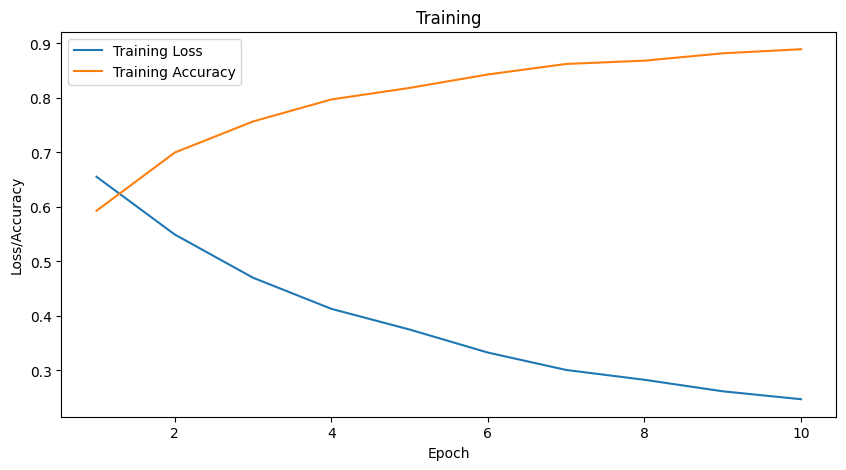

In [20]:
# Plotting the training process
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Training')
plt.legend()
plt.show()

## 6. Métricas de rendimiento

A continuación se presentan algunas métricas de rendimiento

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

test_precision = precision_score(all_labels, all_predictions)
test_recall = recall_score(all_labels, all_predictions)
test_f1 = f1_score(all_labels, all_predictions)

print(f'Precision: {test_precision:.4f}\nRecall: {test_recall:.4f}\nF1: {test_f1:.4f}')

Precision: 0.7710
Recall: 0.8019
F1: 0.7861


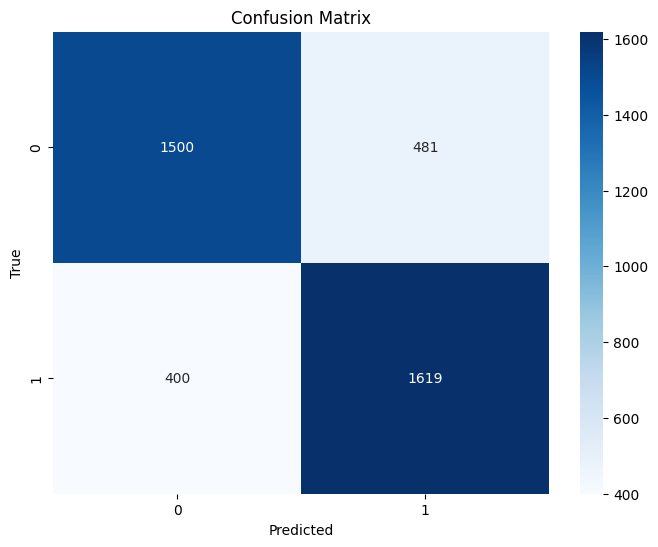

In [22]:
test_conf_matrix = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

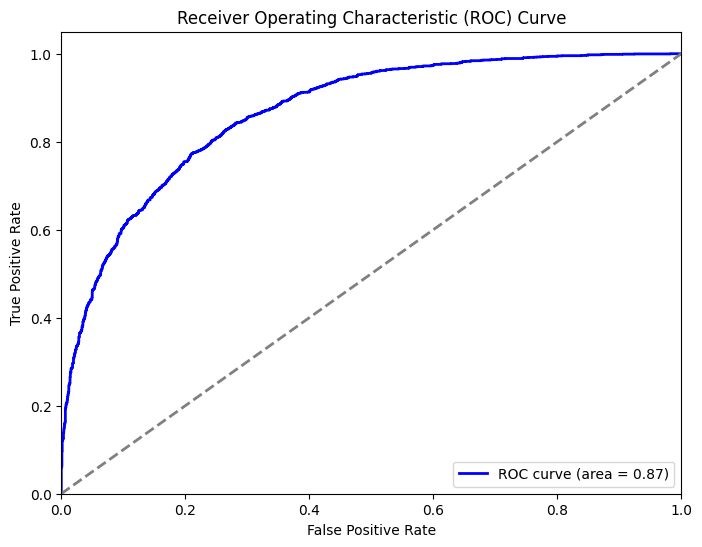

ROC AUC Score: 0.8671


In [23]:
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Score: {roc_auc_score(all_labels, all_probs):.4}')